# Що таке метрики якості? Та навіщо взагалі так багато метрик якості?


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn.metrics import accuracy_score
# Задача з пошуком терориста

# X = [....]
y_true = [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

'''

CLEANING/EDA/MODELING...

'''

#Results
y_pred_1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_pred_2 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y_pred_3 = [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]

print(f'Model results 1: {accuracy_score(y_true, y_pred_1)}')
print(f'Model results 2: {accuracy_score(y_true, y_pred_2)}')
print(f'Model results 3: {accuracy_score(y_true, y_pred_3)}')

Model results 1: 0.92
Model results 2: 0.08
Model results 3: 0.56


# Метрики якості у завданнях регресії

## Середньоквадратична помилка

$$ MSE = 1/n ∑_{i=1}^{n}(h(x_i)-y_i)^2$$

При прогнозуванні ціни на нерухомість. Чим менше квадрат відмінності між фактичною і прогнозованою ціною, тим краще модель.

In [2]:
import numpy as np
def mean_squared_error_manual(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = np.mean((y_true - y_pred)**2)
    return mse

In [3]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(f'manual MSE:{mean_squared_error_manual(y_true, y_pred)}')
print(f'sklearn MSE:{mean_squared_error(y_true, y_pred)}')

manual MSE:0.375
sklearn MSE:0.375


## Середня абсолютна помилка


$$ MAE = 1/n ∑_{i=1}^{n}|h(x_i)-y_i|$$

У задачі прогнозування температури. Оскільки MAE враховує абсолютні відмінності між фактичними і прогнозованими значеннями, вона ідеально підходить для вимірювання точності прогнозування температури.

In [4]:
import numpy as np
def mean_absolute_error_manual(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

In [5]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(f'manual MAE:{mean_absolute_error_manual(y_true, y_pred)}')
print(f'sklearn MAE:{mean_absolute_error(y_true, y_pred)}')

manual MAE:0.5
sklearn MAE:0.5


## Коефіцієнт детермінації

$$ R^2 = 1 - (∑_{i=1}^{n}(h(x_i) - y_i)^2)/(∑_{i=1}^{n}(y_i - \bar{y})^2)$$

Універсальна оцінцка моделі

In [6]:
import numpy as np

def r_squared_manual(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    residual_sum_of_squares = np.sum((y_true - y_pred)**2)
    mean_y_true = np.mean(y_true)
    total_sum_of_squares = np.sum((y_true - mean_y_true)**2)

    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)

    return r2

In [7]:
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(f'manual r2:{r_squared_manual(y_true, y_pred)}')
print(f'sklearn r2:{r2_score(y_true, y_pred)}')

manual r2:0.9486081370449679
sklearn r2:0.9486081370449679


## Несиметричні втрати

Для того, щоб зрозуміти, що таке несиметричні втрати, розглянемо наступний приклад. Нехай потрібно оцінити попит на ноутбуки. У цьому випадку занижений прогноз призведе до втрати лояльності покупців та потенційного прибутку (буде закуплено недостатню кількість ноутбуків), а завищений - до невеликих додаткових витрат на зберігання непроданого товару. Щоб врахувати цей факт, функція втрат має бути несиметричною та сильніше штрафувати за недопрогноз, ніж за перепрогноз. У завданнях, у яких помилки мають різну ціну, використовують несиметричні функції втрат. Прикладом такої функції може бути квантильна помилка, визначається наступним чином:

$$ ρ_\tau = \frac{1}{n} \sum_{i=1}^{n}((1- τ)[y_i<h(x_i)]+τ[y_i>=h(x_i)])(y_i - h(x_i)) $$
де:
$$\tau ϵ [0, 1]$$ визначає те, за що треба штрафувати сильніше — за недопрогноз чи перепрогноз.

## Додаток

Вибір метрики для оцінки моделі залежить від конкретного контексту вашої задачі та ваших цілей.

1. Mean Squared Error (MSE):

Використання: Широко використовується, особливо коли бажано враховувати великі відхилення.
Особливості: Чутлива до великих відхилень через квадратичний член. Може надмірно покладати вагу на викиди.

2. Mean Absolute Error (MAE):

Використання: Добре підходить для вимірювання середньої абсолютної різниці між прогнозованими і справжніми значеннями.
Особливості: Не чутлива до великих викидів. Значення помилок відображають абсолютні розміри відхилень.

3. $R^2$ (Коефіцієнт детермінації):

Використання: Загальна метрика для оцінки якості моделі регресії.
Особливості: Вказує, яку частину дисперсії відгуку пояснюється моделлю. Значення від 0 до 1, де 1 вказує на ідеальне узгодження, а 0 - на відсутність поясненої дисперсії

4. Quantile Loss:

Використання: Квантильна помилка корисна в задачах квантильної регресії, де вам важливо прогнозувати квантильні значення відгуку.
Особливості: Визначає відмінність між реальними і прогнозованими квантилями. Може бути корисною, якщо ви цікавитеся не лише середнім прогнозом, але і розподілом значень.

---------------------------------

Вибір метрики залежить від:

**Задачі**: Якщо важливо точно прогнозувати квантилі - використовуйте квантильну помилку. Якщо важливо оцінювати загальну точність прогнозів - використовуйте R^2, MAE або MSE.

**Особливостей даних**: Якщо ваші дані мають великі викиди, може бути корисним використовувати метрики, які менше чутливі до викидів, такі як MAE.

**Вимог до моделі**: Деякі моделі можуть бути більш чутливими до деяких видів помилок, тому обрання метрики також може бути обумовлене алгоритмічними особливостями моделі.

Важливо також використовувати кілька метрик для повного розуміння ефективності моделі в різних аспектах.

# Метрики якості у завданнях класифікації


## Загальна точність. Частка правильних відповідей (Accuracy)

$$ accuracy = 1/n \sum_{i=1}^{n} [h(x_i) == y_i]$$

Загальна метрика точності

In [8]:
import numpy as np
def accuracy_score_manual(y_true, y_pred):
    correct_predictions = np.sum(np.array(y_true) == np.array(y_pred))
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

In [9]:
from sklearn.metrics import accuracy_score

y_true = [0, 2, 1, 3]
y_pred = [0, 1, 2, 3]

print(f'manual accuracy:{accuracy_score_manual(y_true, y_pred)}')
print(f'sklearn accuracy:{accuracy_score(y_true, y_pred)}')

manual accuracy:0.5
sklearn accuracy:0.5


## Точність та повнота. Матриця помилок

![alt text](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816)

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20230316122103/download-(20).png)

$$ TP = \sum_{i=1}^{n}(y_{true,i} = 1 ;  y_{pred,i} = 1) $$
$$ FP = \sum_{i=1}^{n}(y_{true,i} = 0 ;  y_{pred,i} = 1) $$
$$ FN = \sum_{i=1}^{n}(y_{true,i} = 1 ;  y_{pred,i} = 0) $$
$$ TN = \sum_{i=1}^{n}(y_{true,i} = 0 ;  y_{pred,i} = 0) $$

In [10]:
def calculate_confusion_matrix(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    TN = sum((y_true == 0) & (y_pred == 0))

    return TP, FP, FN, TN

$$ precision = TP/ (TP+FP)$$
$$ recall = TP / (TP+FN)$$
$$ accuracy = (TP+TN) / (TP+FP+FN+TN)$$

**precision**: У задачі виявлення фроду у фінансових транзакціях. Precision вимірює частку правильно класифікованих фродових транзакцій серед усіх транзакцій, визначених як фродові.

**recall**: У задачі медичної діагностики раку. Recall вимірює здатність моделі виявляти всі випадки позитивного класу, тобто всі випадки раку, навіть якщо вони помилково класифікуються як негативні.

In [11]:
def accuracy_score_manual_2(TP, FP, FN, TN):
  return (TP+TN) / (TP + FP + FN + TN)

def precision_score_manual(TP, FP):
  return TP / (TP + FP)

def recall_score_manual(TP, FN):
  return TP / (TP + FN)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1]

TP, FP, FN, TN = calculate_confusion_matrix(y_true, y_pred)
print(TP, FP, FN, TN)
print(f'manual accuracy: {accuracy_score_manual(y_true, y_pred)}')
print(f'manual accuracy_2: {accuracy_score_manual_2(TP, FP, FN, TN)}')
print(f'sklearn accuracy: {accuracy_score(y_true, y_pred)}')
print()
print(f'manual precision_score: {precision_score_manual(TP, FP)}')
print(f'sklearn precision_score: {precision_score(y_true, y_pred)}')
print()
print(f'manual recall_score: {recall_score_manual(TP, FN)}')
print(f'sklearn recall_score: {recall_score(y_true, y_pred)}')

3 0 1 2
manual accuracy: 0.8333333333333334
manual accuracy_2: 0.8333333333333334
sklearn accuracy: 0.8333333333333334

manual precision_score: 1.0
sklearn precision_score: 1.0

manual recall_score: 0.75
sklearn recall_score: 0.75


In [13]:
# Airport terrorists
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_true = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 2 ter + 18 customers

y_pred_1 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 2 ter + 18 customers
y_pred_2 = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 2 ter + 17 customers
y_pred_3 = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 3 ter + 17 customers
y_pred_4 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]# 20 = 1 ter + 19 customers

print(f'precision_score 1: {precision_score(y_true, y_pred_1)}')
print(f'recall_score 1: {recall_score(y_true, y_pred_1)}')
print('-'*50)
print(f'precision_score 2: {precision_score(y_true, y_pred_2)}')
print(f'recall_score 2: {recall_score(y_true, y_pred_2)}')
print('-'*50)
print(f'precision_score 3: {precision_score(y_true, y_pred_3)}')
print(f'recall_score 3: {recall_score(y_true, y_pred_3)}')
print('-'*50)
print(f'precision_score 4: {precision_score(y_true, y_pred_4)}')
print(f'recall_score 4: {recall_score(y_true, y_pred_4)}')

precision_score 1: 1.0
recall_score 1: 1.0
--------------------------------------------------
precision_score 2: 0.5
recall_score 2: 0.5
--------------------------------------------------
precision_score 3: 0.6666666666666666
recall_score 3: 1.0
--------------------------------------------------
precision_score 4: 1.0
recall_score 4: 0.5


In [14]:
# Automated AI air defence system
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_true = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 2 enemy + 18 friendly

y_pred_1 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 2 enemy + 18 friendly
y_pred_2 = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 2 enemy + 17 friendly
y_pred_3 = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 3 enemy + 17 friendly
y_pred_4 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 20 = 1 enemy + 19 friendly

print(f'precision_score 1: {precision_score(y_true, y_pred_1)}')
print(f'recall_score 1: {recall_score(y_true, y_pred_1)}')
print('-'*50)
print(f'precision_score 2: {precision_score(y_true, y_pred_2)}')
print(f'recall_score 2: {recall_score(y_true, y_pred_2)}')
print('-'*50)
print(f'precision_score 3: {precision_score(y_true, y_pred_3)}')
print(f'recall_score 3: {recall_score(y_true, y_pred_3)}')
print('-'*50)
print(f'precision_score 4: {precision_score(y_true, y_pred_4)}')
print(f'recall_score 4: {recall_score(y_true, y_pred_4)}')

precision_score 1: 1.0
recall_score 1: 1.0
--------------------------------------------------
precision_score 2: 0.5
recall_score 2: 0.5
--------------------------------------------------
precision_score 3: 0.6666666666666666
recall_score 3: 1.0
--------------------------------------------------
precision_score 4: 1.0
recall_score 4: 0.5


## Об'єднання точності та повноти

У деяких завданнях є обмеження на одну з цих метрик, тоді як за другою метрикою буде проводитися оптимізація. Але в деяких випадках хочеться максимізувати і точність, і повноту водночас. Постає питання про поєднання цих двох метрик.

1. Арифиметичне середнє
$$ A = (precision+recall)/2 $$
2. Мінімум
$$ M = min(precision, recall)$$
3. F1-міра
$$ F1 = (2 ⋅ precision ⋅ recall)/ (precision + recall)$$
4. Розширина F-міра
$$ F = (1+ β^2 )⋅(precision * recall)/ (β^2\cdot precision + recall)$$


У задачі виявлення шкідливих програмних кодів. Точність важлива, щоб не помилитися при визначенні шкідливого коду, але також важлива і повнота, щоб забезпечити виявлення якомога більшої кількості шкідливих програм. F1 дозволяє збалансувати ці дві метрики, щоб забезпечити оптимальне рішення.

In [15]:
def f1_score_manual(y_true, y_pred):
  TP, FP, FN, TN = calculate_confusion_matrix(y_true, y_pred)
  pr = precision_score_manual(TP, FP)
  rec = recall_score_manual(TP, FN)
  return 2*pr*rec/ (pr+rec)

In [16]:
from sklearn.metrics import f1_score

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1]

print(f'manual recall_score: {f1_score_manual(y_true, y_pred)}')
print(f'sklearn recall_score: {f1_score(y_true, y_pred)}')

manual recall_score: 0.8571428571428571
sklearn recall_score: 0.8571428571428571


## Метрики багатокласової класифікації

У випадку багатокласової класифікації існує кілька різновидів метрик точності (accuracy), оскільки існують різні способи обчислення точності в залежності від задачі та конкретних потреб. Ось декілька з них:

1. Micro-Average Accuracy:
$$A_{micro} = (TP_1+ TP_2+...+TP_k)/len(data)$$

Краще використовувати, коли ідеальний баланс в класах. І треба отримати точні метрики по кожному з класів.

2. Macro-Average Accuracy:
$$A_{macro} = (A_1+ A_2+...+A_k)/k$$

Краще використовувати, коли в класах сильний дізбаланс, і ваги даються відповідно до симетричності.

3. Weighted Accuracy:
$$A_{weighted} = (\sum_{i=1}^{k}Size_i⋅A_i )/\sum_{i=1}^{k}Size_i$$

Ваги даються відповідно до класу (маленьким меньше, великим більше)

4. Accuracy per Class:
$$ A_i$$

# Якість оцінок принадлежності класу

## PR-крива

PR-крива (Precision-Recall curve) використовується для визначення ефективності моделі в задачах класифікації, особливо там, де дисбаланс класів (нерівномірність розподілу між класами) є проблемою. Вона відображає залежність між точністю (Precision) і повнотою (Recall) при різних порогових значеннях для моделі класифікації.PR-крива будується, варіюючи порогові значення для визначення класів (наприклад, визначення, коли модель вважає вхід позитивним). Крива показує, як змінюються точність і повнота при різних порогових значеннях.

Сенс PR-кривої:

- **Ідеальний випадок**: PR-крива прямує від нижнього лівого кута до верхнього правого кута, що вказує на високу точність і повноту при різних порогових значеннях.
- **Менш ідеальний випадок**: Зниження кривої означає, що модель може визначати позитивні елементи з меншою точністю або повнотою, залежно від обраного порогу.


![alt text](https://miro.medium.com/v2/resize:fit:1024/1*KZu3UEBx3UIgOvdS6V_h_A.png)

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*Dmsoecp2PPYRIXJk_ESBdw.gif)

PR-крива показує взаємозв'язок між точністю (Precision) та чутливістю (Recall) моделі для різних значень порогу вирішення. Вона особливо корисна в ситуаціях, коли неправильна класифікація позитивних екземплярів коштує більше, ніж неправильна класифікація негативних екземплярів, наприклад у задачах виявлення хвороби.

PR_AUC: 0.7424999999999999


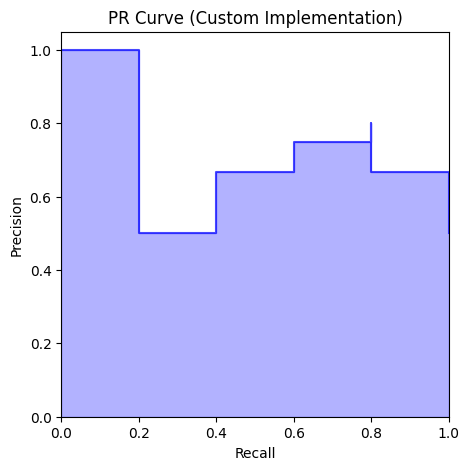

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def precision_recall_curve_custom(y_true, y_scores):
    thresholds = sorted(set(y_scores), reverse=True)
    precision_values = []
    recall_values = []

    precision_values.append(1)
    recall_values.append(0)

    num_positives = sum(y_true)
    num_negatives = len(y_true) - num_positives

    for threshold in thresholds:
        y_pred = [1 if score >= threshold else 0 for score in y_scores]

        true_positives = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1])
        false_positives = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1])
        false_negatives = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0])

        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0

        precision_values.append(precision)
        recall_values.append(recall)

    return np.array(precision_values), np.array(recall_values), thresholds

def precision_recall_auc(precision, recall):
    auc = np.trapz(precision, recall)
    return auc

# Приклад використання:
# Задаємо справжні значення та оцінки вірогідностей для позитивного класу
y_true = np.array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])
y_scores = np.array([0.2, 0.8, 0.6, 0.3, 0.7, 0.9, 0.4, 0.1, 0.5, 0.3])

precision_values, recall_values, thresholds = precision_recall_curve_custom(y_true, y_scores)
print(f'PR_AUC: {precision_recall_auc(precision_values, recall_values)}')

# Візуалізація PR-кривої
plt.figure(figsize=(5, 5))

plt.step(recall_values, precision_values, color='b', alpha=0.7, where='post')
plt.fill_between(recall_values, precision_values, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR Curve (Custom Implementation)')
plt.show()

PR_AUC: 0.7424999999999999


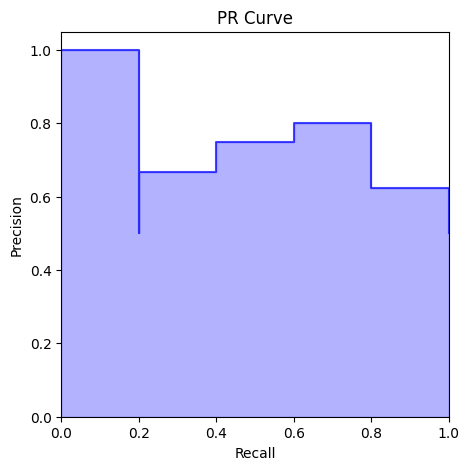

In [18]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print(f'PR_AUC: {auc(recall[::-1], precision[::-1])}')

# Візуалізація PR-кривої
plt.figure(figsize=(5, 5))

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR Curve')
plt.show()

## ROC-крива

Другий спосіб виміряти якість оцінок приналежності до класу 1— ROC-крива, яка будується в осях **False Positive Rate** (ось X) та **True Positive Rate** (ось Y):

$$ FPR = FP/(FP+TN)$$
$$ TPR = TP/(TP+FN) = recall$$

ROC-крива будується аналогічно PR-кривий: поступово розглядаються випадки різних значень порогів та відзначаються точки на графіку.Крива стартує з точки (0,0) і приходить в точку (1,1). При цьому якщо існує ідеальний класифікатор, крива має пройти через точку (0,1). Чим ближче крива до цієї точки, тим краще будуть оцінки, а площа під кривою буде характеризувати якість оцінок належності до першого класу. Така метрика називається AUC–ROC, або площа під ROC-кривої.

У задачі класифікації раку на основі медичних зображень. AUC-ROC вимірює здатність моделі робити правильні рішення відносно різних порогових значень ймовірності.

![alt text](https://miro.medium.com/v2/resize:fit:1200/1*Bgc9QOjhnL70g2SQxyj6hQ.png)

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*Dmsoecp2PPYRIXJk_ESBdw.gif)

ROC-крива відображає взаємозв'язок між чутливістю (True Positive Rate) та специфічністю (1 - False Positive Rate) моделі для різних значень порогу вирішення. У випадках дисбалансу класів, ROC-крива може дати коректну оцінку продуктивності моделі, оскільки обидва ці показники враховуються незалежно від пропорцій класів.

AUC-ROC: 0.78


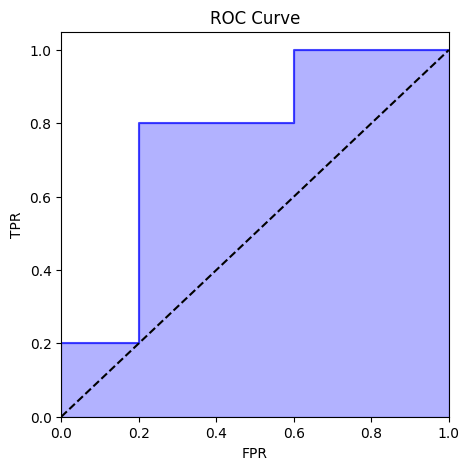

In [19]:
import numpy as np

def roc_curve_custom(y_true, y_scores):
    thresholds = sorted(set(y_scores), reverse=True)
    tpr_values = []  # True Positive Rate (Sensitivity)
    fpr_values = []  # False Positive Rate

    num_positives = sum(y_true)
    num_negatives = len(y_true) - num_positives

    for threshold in thresholds:
        y_pred = [1 if score >= threshold else 0 for score in y_scores]

        true_positives = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1])
        false_positives = sum([1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1])

        tpr = true_positives / num_positives
        fpr = false_positives / num_negatives

        tpr_values.append(tpr)
        fpr_values.append(fpr)


    return tpr_values, fpr_values, thresholds

def roc_auc(tpr, fpr):
    # Визначення площі під кривою методом трапецій
    auc = np.trapz(tpr, fpr)
    return auc

# Приклад використання:
# Задаємо справжні значення та оцінки вірогідностей для позитивного класу
y_true = np.array([0, 0, 1,1, 1, 1, 0, 0, 1, 0])
y_scores = np.array([0.2, 0.8, 0.6, 0.3, 0.7, 0.9, 0.4, 0.1, 0.5, 0.3])

tpr_values, fpr_values, thresholds = roc_curve_custom(y_true, y_scores)
auc_roc = roc_auc(tpr_values, fpr_values)

# Друкуємо AUC-ROC
print("AUC-ROC:", auc_roc)

# Візуалізація PR-кривої
plt.figure(figsize=(5, 5))

plt.step(fpr_values, tpr_values, color='b', alpha=0.7, where='post')
plt.fill_between(fpr_values, tpr_values, step='post', alpha=0.3, color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC Curve')
plt.show()

ROC_AUC: 0.78


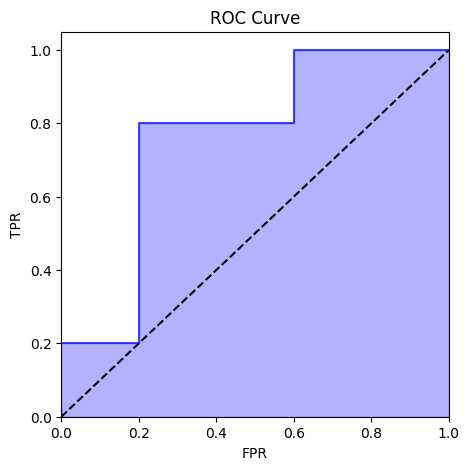

In [20]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(f'ROC_AUC: {auc(fpr, tpr)}')

# Візуалізація ROC-кривої
plt.figure(figsize=(5, 5))

plt.step(fpr, tpr, color='b', alpha=0.7, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.3, color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC Curve')
plt.show()